## Visualize Results: Plots

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.ticker as mticker
import numpy as np
from datetime import datetime
import matplotlib.dates as mdates
import seaborn as sns
from scipy.interpolate import make_interp_spline
from sklearn.metrics import root_mean_squared_error

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
# conversion from inches to cm for easier plotting
cm = 1/2.54

### Forest Area

In [9]:
# read forest area data
forest_area = pd.read_csv("./Tables/Forest_GER_Area.csv")

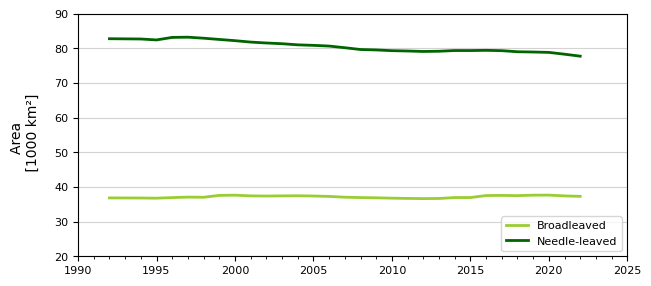

In [10]:
# plot evolution of german forest area across time
data = forest_area
fig, ax = plt.subplots(figsize=(18*cm,8*cm))
ax.plot('Year', data["BL"]/1000, data=data, color='yellowgreen', linewidth=2, linestyle='-', label="Broadleaved")
ax.plot('Year', data["NL"]/1000, data=data, color='darkgreen', linewidth=2, linestyle='-', label="Needle-leaved")
for label in ax.get_xticklabels(which='major'):
    label.set(fontsize=8)
    ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='y', labelsize=8)
ax.set_ylim(20,90)
ax.set_xlim(1990, 2025)
ax.set_ylabel('Area \n [1000 km²]', fontsize=10, labelpad=10)
ax.grid(True, axis='y', color='lightgrey')
ax.legend(loc=4, fontsize=8,  bbox_to_anchor=(1, 0), ncols = 1)
plt.savefig("./Figures/Forest_Area_GER.png", bbox_inches="tight", dpi = 300)

### Harmonized NDVI

In [11]:
# read HARMONIZED yearly mean ndvi data
ndvi_BL = pd.read_csv("./Tables/Spatial_Means/NDVI_Yearly_Spatial_Means_BL_harmonized.csv")
ndvi_NL = pd.read_csv("./Tables/Spatial_Means/NDVI_Yearly_Spatial_Means_NL_harmonized.csv")

In [12]:
# add column with year
ndvi_BL["year"] = ndvi_BL["time"].str[0:4].astype(int)
ndvi_NL["year"] = ndvi_NL["time"].str[0:4].astype(int)

In [13]:
# calculate trend lines
# get equation for trendline
fit_ndvi_BL = np.polyfit(ndvi_BL["year"], ndvi_BL["GER"], 1)
fit_ndvi_NL = np.polyfit(ndvi_NL["year"], ndvi_NL["GER"], 1)

fit_ndvi_BL_fun = np.poly1d(fit_ndvi_BL)
fit_ndvi_NL_fun = np.poly1d(fit_ndvi_NL)

In [14]:
# interpolate data for smoother lines
# create denser range of x axis values
x_spline = np.linspace(ndvi_BL["year"].min(), ndvi_BL["year"].max(), 500)

# create spline object
spl_BL = make_interp_spline(ndvi_BL["year"], ndvi_BL["GER"])
spl_NL = make_interp_spline(ndvi_NL["year"], ndvi_NL["GER"])

# evaluate the spline at the denser x axis points to get the interpolated values
ndvi_BL_interpolated = spl_BL(x_spline)
ndvi_NL_interpolated = spl_NL(x_spline)

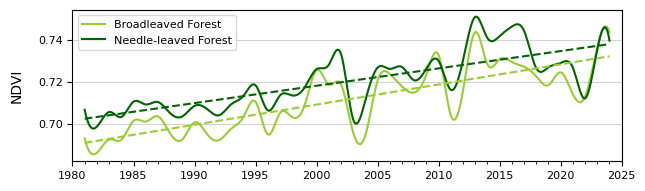

In [15]:
# plot evolution of yearly NDVI across time
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot(x_spline, ndvi_BL_interpolated, color='yellowgreen', linewidth=1.5, linestyle='-', label="Broadleaved Forest")
ax.plot(x_spline, ndvi_NL_interpolated, color='darkgreen', linewidth=1.5, linestyle='-', label="Needle-leaved Forest")
ax.plot(ndvi_BL["year"], fit_ndvi_BL_fun(ndvi_BL['year']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(ndvi_NL["year"], fit_ndvi_NL_fun(ndvi_NL['year']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('NDVI', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=2, fontsize=8,  bbox_to_anchor=(0, 1))
plt.savefig("./Figures/NDVI_Yearly_GER_harmonized.png", bbox_inches="tight", dpi = 300)

In [121]:
# get the columns for the federal states
state_columns = [col for col in ndvi_BL.columns if col not in ["time", "year", "GER"]]

# create denser range of x axis values
x_spline = np.linspace(ndvi_BL["year"].min(), ndvi_BL["year"].max(), 500)

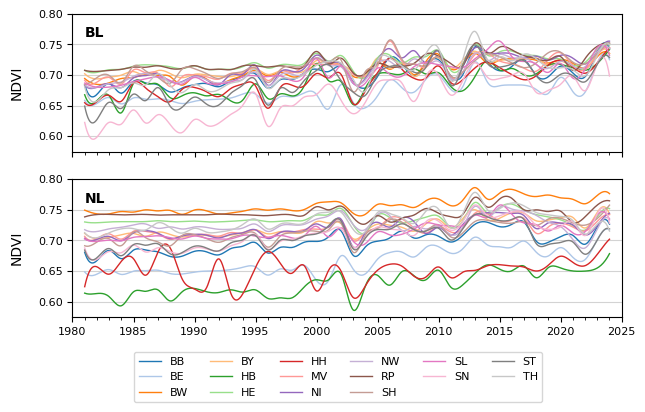

In [122]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True)
colors = plt.cm.tab20.colors

# loop through each state column for BL
for i, state in enumerate(state_columns):
    years = ndvi_BL["year"]
    values = ndvi_BL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax1.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax1.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax1.tick_params(axis='both', labelsize=8)
ax1.set_ylabel('NDVI', fontsize=10, labelpad=10)
ax1.set_xlim(1980, 2025)
ax1.set_ylim(0.575, 0.8)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(1981, 0.78, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

# loop through each state column for NL
for i, state in enumerate(state_columns):
    years = ndvi_NL["year"]
    values = ndvi_NL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax2.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax2.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('NDVI', fontsize=10, labelpad=10)
ax2.set_xlim(1980, 2025)
ax2.set_ylim(0.575, 0.8)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(1981, 0.78, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=8, bbox_to_anchor=(0.5, -0.12), ncols=6)

plt.savefig("./Figures/NDVI_Yearly_States_harmonized.png", bbox_inches="tight", dpi = 300)
plt.show()

### Harmonized FAPAR

In [21]:
# read HARMONIZED yearly mean fapar data
fapar_BL = pd.read_csv("./Tables/Spatial_Means/FAPAR_Yearly_Spatial_Means_BL_harmonized.csv")
fapar_NL = pd.read_csv("./Tables/Spatial_Means/FAPAR_Yearly_Spatial_Means_NL_harmonized.csv")

In [22]:
# add column with year
fapar_BL["year"] = fapar_BL["time"].str[0:4].astype(int)
fapar_NL["year"] = fapar_NL["time"].str[0:4].astype(int)

In [23]:
# calculate trend lines
# get equation for trendline
fit_fapar_BL = np.polyfit(fapar_BL["year"], fapar_BL["GER"], 1)
fit_fapar_NL = np.polyfit(fapar_NL["year"], fapar_NL["GER"], 1)

fit_fapar_BL_fun = np.poly1d(fit_fapar_BL)
fit_fapar_NL_fun = np.poly1d(fit_fapar_NL)

In [24]:
# interpolate data for smoother lines
# create denser range of x axis values
x_spline = np.linspace(fapar_BL["year"].min(), fapar_BL["year"].max(), 500)

# create spline object
spl_BL = make_interp_spline(fapar_BL["year"], fapar_BL["GER"])
spl_NL = make_interp_spline(fapar_NL["year"], fapar_NL["GER"])

# evaluate the spline at the denser x axis points to get the interpolated values
fapar_BL_interpolated = spl_BL(x_spline)
fapar_NL_interpolated = spl_NL(x_spline)

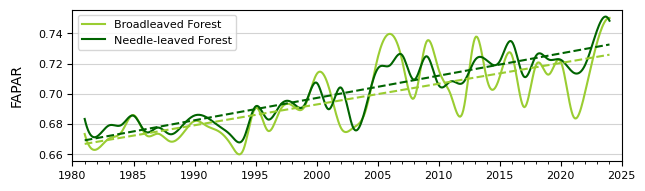

In [25]:
# plot evolution of yearly fapar across time
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot(x_spline, fapar_BL_interpolated, color='yellowgreen', linewidth=1.5, linestyle='-', label="Broadleaved Forest")
ax.plot(x_spline, fapar_NL_interpolated, color='darkgreen', linewidth=1.5, linestyle='-', label="Needle-leaved Forest")
ax.plot(fapar_BL["year"], fit_fapar_BL_fun(fapar_BL['year']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(fapar_NL["year"], fit_fapar_NL_fun(fapar_NL['year']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('FAPAR', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=2, fontsize=8,  bbox_to_anchor=(0, 1))
plt.savefig("./Figures/FAPAR_Yearly_GER_harmonized.png", bbox_inches="tight", dpi = 300)

In [125]:
# get the columns for the federal states
state_columns = [col for col in fapar_BL.columns if col not in ["time", "year", "GER"]]

# create denser range of x axis values
x_spline = np.linspace(fapar_BL["year"].min(), fapar_BL["year"].max(), 500)

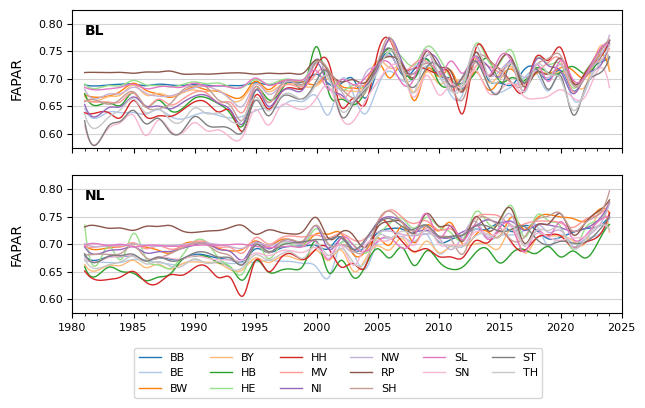

In [126]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True)
colors = plt.cm.tab20.colors

# loop through each state column for BL
for i, state in enumerate(state_columns):
    years = fapar_BL["year"]
    values = fapar_BL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax1.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax1.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax1.tick_params(axis='both', labelsize=8)
ax1.set_ylabel('FAPAR', fontsize=10, labelpad=10)
ax1.set_xlim(1980, 2025)
ax1.set_ylim(0.575, 0.825)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(1981, 0.8, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

# loop through each state column for NL
for i, state in enumerate(state_columns):
    years = fapar_NL["year"]
    values = fapar_NL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax2.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax2.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('FAPAR', fontsize=10, labelpad=10)
ax2.set_xlim(1980, 2025)
ax2.set_ylim(0.575, 0.825)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(1981, 0.8, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=8, bbox_to_anchor=(0.5, -0.12), ncols=6)

plt.savefig("./Figures/FAPAR_Yearly_States_harmonized.png", bbox_inches="tight", dpi = 300)
plt.show()

### Harmonized LAI

In [16]:
# read HARMONIZED yearly mean lai data
lai_BL = pd.read_csv("./Tables/Spatial_Means/LAI_Yearly_Spatial_Means_BL_harmonized.csv")
lai_NL = pd.read_csv("./Tables/Spatial_Means/LAI_Yearly_Spatial_Means_NL_harmonized.csv")

In [17]:
# add column with year
lai_BL["year"] = lai_BL["time"].str[0:4].astype(int)
lai_NL["year"] = lai_NL["time"].str[0:4].astype(int)

In [18]:
# calculate trend lines
# get equation for trendline
fit_lai_BL = np.polyfit(lai_BL["year"], lai_BL["GER"], 1)
fit_lai_NL = np.polyfit(lai_NL["year"], lai_NL["GER"], 1)

fit_lai_BL_fun = np.poly1d(fit_lai_BL)
fit_lai_NL_fun = np.poly1d(fit_lai_NL)

In [19]:
# interpolate data for smoother lines
# create denser range of x axis values
x_spline = np.linspace(lai_BL["year"].min(), lai_BL["year"].max(), 500)

# create spline object
spl_BL = make_interp_spline(lai_BL["year"], lai_BL["GER"])
spl_NL = make_interp_spline(lai_NL["year"], lai_NL["GER"])

# evaluate the spline at the denser x axis points to get the interpolated values
lai_BL_interpolated = spl_BL(x_spline)
lai_NL_interpolated = spl_NL(x_spline)

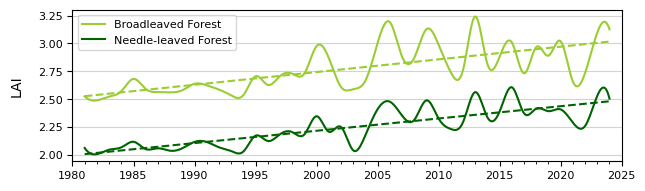

In [20]:
# plot evolution of yearly lai across time
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot(x_spline, lai_BL_interpolated, color='yellowgreen', linewidth=1.5, linestyle='-', label="Broadleaved Forest")
ax.plot(x_spline, lai_NL_interpolated, color='darkgreen', linewidth=1.5, linestyle='-', label="Needle-leaved Forest")
ax.plot(lai_BL["year"], fit_lai_BL_fun(lai_BL['year']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(lai_NL["year"], fit_lai_NL_fun(lai_NL['year']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('LAI', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=2, fontsize=8,  bbox_to_anchor=(0, 1))
plt.savefig("./Figures/LAI_Yearly_GER_harmonized.png", bbox_inches="tight", dpi = 300)

In [129]:
# get the columns for the federal states
state_columns = [col for col in lai_BL.columns if col not in ["time", "year", "GER"]]

# create denser range of x axis values
x_spline = np.linspace(lai_BL["year"].min(), lai_BL["year"].max(), 500)

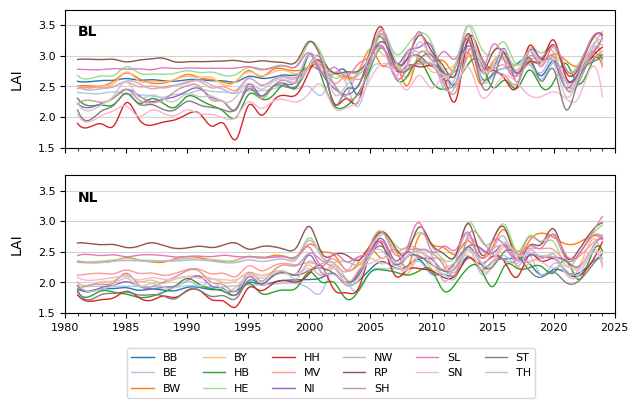

In [130]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True)
colors = plt.cm.tab20.colors

# loop through each state column for BL
for i, state in enumerate(state_columns):
    years = lai_BL["year"]
    values = lai_BL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax1.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax1.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax1.tick_params(axis='both', labelsize=8)
ax1.set_ylabel('LAI', fontsize=10, labelpad=10)
ax1.set_xlim(1980, 2025)
ax1.set_ylim(1.5, 3.75)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(1981, 3.5, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

# loop through each state column for NL
for i, state in enumerate(state_columns):
    years = lai_NL["year"]
    values = lai_NL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax2.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax2.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('LAI', fontsize=10, labelpad=10)
ax2.set_xlim(1980, 2025)
ax2.set_ylim(1.5, 3.75)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(1981, 3.5, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=8, bbox_to_anchor=(0.5, -0.12), ncols=6)

plt.savefig("./Figures/LAI_Yearly_States_harmonized.png", bbox_inches="tight", dpi = 300)
plt.show()

### Air Temperature

In [26]:
# read yearly mean air temperature data
t2m_BL = pd.read_csv("./Tables/Spatial_Means/Temperature_Yearly_Spatial_Means_BL.csv")
t2m_NL = pd.read_csv("./Tables/Spatial_Means/Temperature_Yearly_Spatial_Means_NL.csv")

In [27]:
# add column with year
t2m_BL["year"] = t2m_BL["time"].str[0:4].astype(int)
t2m_NL["year"] = t2m_NL["time"].str[0:4].astype(int)

In [28]:
# calculate trend lines
# get equation for trendline
fit_t2m_BL = np.polyfit(t2m_BL["year"], t2m_BL["GER"], 1)
fit_t2m_NL = np.polyfit(t2m_NL["year"], t2m_NL["GER"], 1)

fit_t2m_BL_fun = np.poly1d(fit_t2m_BL)
fit_t2m_NL_fun = np.poly1d(fit_t2m_NL)

In [29]:
# interpolate data for smoother lines
# create denser range of x axis values
x_spline = np.linspace(t2m_BL["year"].min(), t2m_BL["year"].max(), 500)

# create spline object
spl_BL = make_interp_spline(t2m_BL["year"], t2m_BL["GER"])
spl_NL = make_interp_spline(t2m_NL["year"], t2m_NL["GER"])

# evaluate the spline at the denser x axis points to get the interpolated values
t2m_BL_interpolated = spl_BL(x_spline)
t2m_NL_interpolated = spl_NL(x_spline)

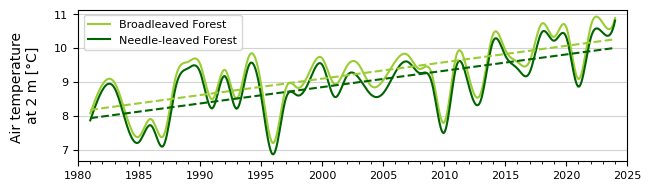

In [30]:
# plot evolution of yearly air temperature across time
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot(x_spline, t2m_BL_interpolated, color='yellowgreen', linewidth=1.5, linestyle='-', label="Broadleaved Forest")
ax.plot(x_spline, t2m_NL_interpolated, color='darkgreen', linewidth=1.5, linestyle='-', label="Needle-leaved Forest")
ax.plot(t2m_BL["year"], fit_t2m_BL_fun(t2m_BL['year']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(t2m_NL["year"], fit_t2m_NL_fun(t2m_NL['year']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Air temperature \nat 2 m [°C]', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
#ax.set_ylim(6.2, 11.1)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=2, fontsize=8,  bbox_to_anchor=(0, 1))
plt.savefig("./Figures/Temperature_Yearly_GER.png", bbox_inches="tight", dpi = 300)

In [133]:
# get the columns for the federal states
state_columns = [col for col in t2m_BL.columns if col not in ["time", "year", "GER"]]

# create denser range of x axis values
x_spline = np.linspace(t2m_BL["year"].min(), t2m_BL["year"].max(), 500)

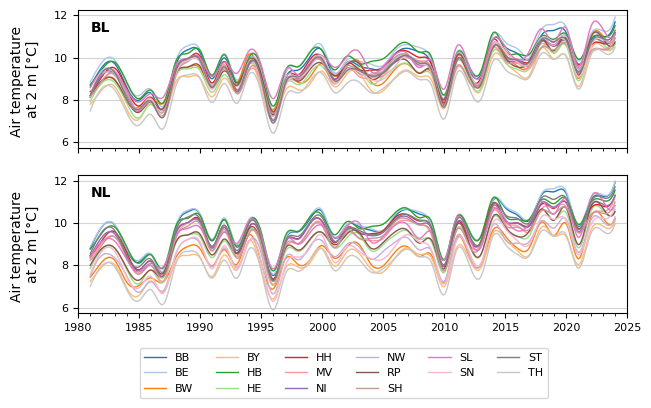

In [134]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True)
colors = plt.cm.tab20.colors

# loop through each state column for BL
for i, state in enumerate(state_columns):
    years = t2m_BL["year"]
    values = t2m_BL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax1.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax1.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax1.tick_params(axis='both', labelsize=8)
ax1.set_ylabel('Air temperature \nat 2 m [°C]', fontsize=10, labelpad=10)
ax1.set_xlim(1980, 2025)
ax1.set_ylim(5.75, 12.25)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(1981, 11.75, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

# loop through each state column for NL
for i, state in enumerate(state_columns):
    years = t2m_NL["year"]
    values = t2m_NL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax2.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax2.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('Air temperature \nat 2 m [°C]', fontsize=10, labelpad=10)
ax2.set_xlim(1980, 2025)
ax2.set_ylim(5.75, 12.25)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(1981, 11.75, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=8, bbox_to_anchor=(0.5, -0.12), ncols=6)

plt.savefig("./Figures/Temperature_Yearly_States.png", bbox_inches="tight", dpi = 300)
plt.show()

### Precipitation

In [31]:
# read yearly mean precipiation data
tp = pd.read_csv("./Tables/Spatial_Means/Precipitation_Yearly_Spatial_Means_GER.csv")

In [32]:
# add column with year
tp["year"] = tp["time"].str[0:4].astype(int)

In [33]:
# calculate trend lines
# get equation for trendline
fit_tp = np.polyfit(tp["year"], tp["GER"], 1)
fit_tp_fun = np.poly1d(fit_tp)

In [34]:
# interpolate data for smoother lines
# create denser range of x axis values
x_spline = np.linspace(tp["year"].min(), tp["year"].max(), 500)

# create spline object
spl= make_interp_spline(tp["year"], tp["GER"])

# evaluate the spline at the denser x axis points to get the interpolated values
tp_interpolated = spl(x_spline)

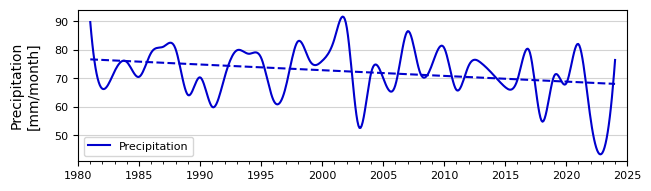

In [35]:
# plot evolution of yearly precipitation across time
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot(x_spline, tp_interpolated, color='mediumblue', linewidth=1.5, linestyle='-', label="Precipitation")
ax.plot(tp["year"], fit_tp_fun(tp['year']), color='mediumblue', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Precipitation\n[mm/month]', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=3, fontsize=8,  bbox_to_anchor=(0, 0), ncol = 2)
plt.savefig("./Figures/Precipitation_Yearly_GER.png", bbox_inches="tight", dpi = 300)

In [137]:
# get the columns for the federal states
state_columns = [col for col in tp.columns if col not in ["time", "year", "GER"]]

# create denser range of x axis values
x_spline = np.linspace(tp["year"].min(), tp["year"].max(), 500)

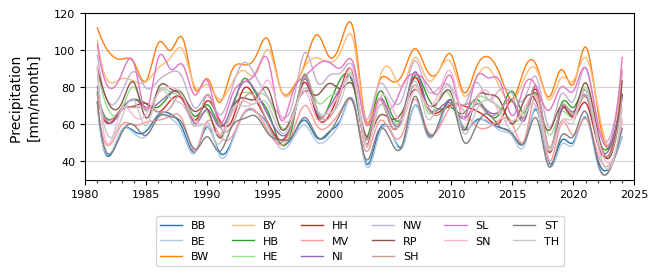

In [138]:
# plot evolution of yearly precipitation in federal states over time
fig, ax = plt.subplots(figsize=(18*cm,5.5*cm))
colors = plt.cm.tab20.colors

# loop through each state column
for i, state in enumerate(state_columns):
    years = tp["year"]
    values = tp[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Precipitation \n[mm/month]', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.set_ylim(30, 120)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=8, fontsize=8,  bbox_to_anchor=(0.5, -0.55), ncols = 6)
plt.savefig("./Figures/Precipitation_Yearly_States.png", bbox_inches="tight", dpi = 300)

### Wind Speed

In [36]:
# read yearly mean wind speed data
wind_BL = pd.read_csv("./Tables/Spatial_Means/Windspeed_Yearly_Spatial_Means_BL.csv")
wind_NL = pd.read_csv("./Tables/Spatial_Means/Windspeed_Yearly_Spatial_Means_NL.csv")

In [37]:
# add column with year
wind_BL["year"] = wind_BL["time"].str[0:4].astype(int)
wind_NL["year"] = wind_NL["time"].str[0:4].astype(int)

In [38]:
# calculate trend lines
# get equation for trendline
fit_wind_BL = np.polyfit(wind_BL["year"], wind_BL["GER"], 1)
fit_wind_NL = np.polyfit(wind_NL["year"], wind_NL["GER"], 1)

fit_wind_BL_fun = np.poly1d(fit_wind_BL)
fit_wind_NL_fun = np.poly1d(fit_wind_NL)

In [39]:
# interpolate data for smoother lines
# create denser range of x axis values
x_spline = np.linspace(wind_BL["year"].min(), wind_BL["year"].max(), 500)

# create spline object
spl_BL = make_interp_spline(wind_BL["year"], wind_BL["GER"])
spl_NL = make_interp_spline(wind_NL["year"], wind_NL["GER"])

# evaluate the spline at the denser x axis points to get the interpolated values
wind_BL_interpolated = spl_BL(x_spline)
wind_NL_interpolated = spl_NL(x_spline)

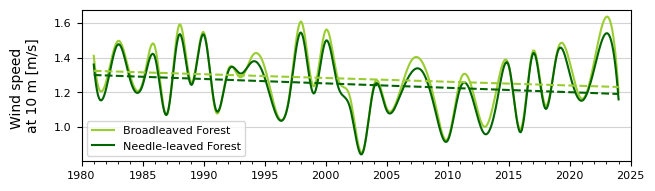

In [40]:
# plot evolution of yearly windspeed across time
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot(x_spline, wind_BL_interpolated, color='yellowgreen', linewidth=1.5, linestyle='-', label="Broadleaved Forest")
ax.plot(x_spline, wind_NL_interpolated, color='darkgreen', linewidth=1.5, linestyle='-', label="Needle-leaved Forest")
ax.plot(wind_BL["year"], fit_wind_BL_fun(wind_BL['year']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(wind_NL["year"], fit_wind_NL_fun(wind_NL['year']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Wind speed \nat 10 m [m/s]', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=3, fontsize=8,  bbox_to_anchor=(0, 0), ncol = 1)
plt.savefig("./Figures/Windspeed_Yearly_GER.png", bbox_inches="tight", dpi = 300)

In [141]:
# get the columns for the federal states
state_columns = [col for col in wind_BL.columns if col not in ["time", "year", "GER"]]

# create denser range of x axis values
x_spline = np.linspace(wind_BL["year"].min(), wind_BL["year"].max(), 500)

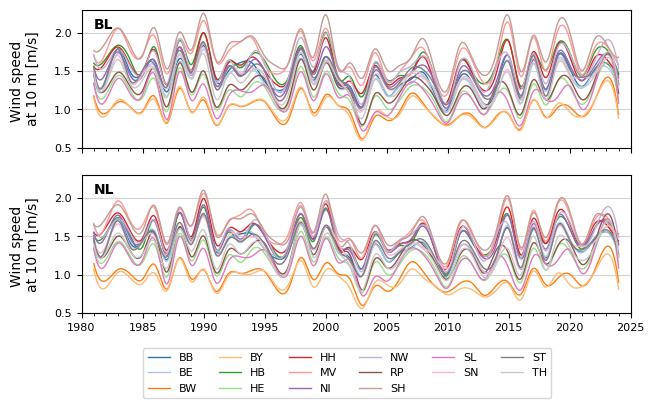

In [142]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True)
colors = plt.cm.tab20.colors

# loop through each state column for BL
for i, state in enumerate(state_columns):
    years = wind_BL["year"]
    values = wind_BL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax1.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax1.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax1.tick_params(axis='both', labelsize=8)
ax1.set_ylabel('Wind speed \nat 10 m [m/s]', fontsize=10, labelpad=10)
ax1.set_xlim(1980, 2025)
ax1.set_ylim(0.5, 2.3)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(1981, 2.2, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

# loop through each state column for NL
for i, state in enumerate(state_columns):
    years = wind_NL["year"]
    values = wind_NL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax2.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax2.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('Wind speed \nat 10 m [m/s]', fontsize=10, labelpad=10)
ax2.set_xlim(1980, 2025)
ax2.set_ylim(0.5, 2.3)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(1981, 2.2, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=8, bbox_to_anchor=(0.5, -0.12), ncols=6)

plt.savefig("./Figures/Windspeed_Yearly_States.png", bbox_inches="tight", dpi = 300)
plt.show()

### Soil Moisture

In [41]:
# read yearly mean soil moisture data
swvl1_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_1_Yearly_Spatial_Means_BL.csv")
swvl1_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_1_Yearly_Spatial_Means_NL.csv")
swvl2_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_2_Yearly_Spatial_Means_BL.csv")
swvl2_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_2_Yearly_Spatial_Means_NL.csv")
swvl3_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_3_Yearly_Spatial_Means_BL.csv")
swvl3_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_3_Yearly_Spatial_Means_NL.csv")
swvl4_BL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_4_Yearly_Spatial_Means_BL.csv")
swvl4_NL = pd.read_csv("./Tables/Spatial_Means/Soil_Water_4_Yearly_Spatial_Means_NL.csv")

In [42]:
# add column with year
swvl1_BL["year"] = swvl1_BL["time"].str[0:4].astype(int)
swvl1_NL["year"] = swvl1_NL["time"].str[0:4].astype(int)
swvl2_BL["year"] = swvl2_BL["time"].str[0:4].astype(int)
swvl2_NL["year"] = swvl2_NL["time"].str[0:4].astype(int)
swvl3_BL["year"] = swvl3_BL["time"].str[0:4].astype(int)
swvl3_NL["year"] = swvl3_NL["time"].str[0:4].astype(int)
swvl4_BL["year"] = swvl4_BL["time"].str[0:4].astype(int)
swvl4_NL["year"] = swvl4_NL["time"].str[0:4].astype(int)

In [43]:
# interpolate data for smoother lines
# create denser range of x axis values
x_spline = np.linspace(swvl1_BL["year"].min(), swvl1_BL["year"].max(), 500)

# create spline object
spl_swvl1_BL = make_interp_spline(swvl1_BL["year"], swvl1_BL["GER"])
spl_swvl1_NL = make_interp_spline(swvl1_NL["year"], swvl1_NL["GER"])
spl_swvl2_BL = make_interp_spline(swvl2_BL["year"], swvl2_BL["GER"])
spl_swvl2_NL = make_interp_spline(swvl2_NL["year"], swvl2_NL["GER"])
spl_swvl3_BL = make_interp_spline(swvl3_BL["year"], swvl3_BL["GER"])
spl_swvl3_NL = make_interp_spline(swvl3_NL["year"], swvl3_NL["GER"])
spl_swvl4_BL = make_interp_spline(swvl4_BL["year"], swvl4_BL["GER"])
spl_swvl4_NL = make_interp_spline(swvl4_NL["year"], swvl4_NL["GER"])

# evaluate the spline at the denser x axis points to get the interpolated values
swvl1_BL_interpolated = spl_swvl1_BL(x_spline)
swvl1_NL_interpolated = spl_swvl1_NL(x_spline)
swvl2_BL_interpolated = spl_swvl2_BL(x_spline)
swvl2_NL_interpolated = spl_swvl2_NL(x_spline)
swvl3_BL_interpolated = spl_swvl3_BL(x_spline)
swvl3_NL_interpolated = spl_swvl3_NL(x_spline)
swvl4_BL_interpolated = spl_swvl4_BL(x_spline)
swvl4_NL_interpolated = spl_swvl4_NL(x_spline)

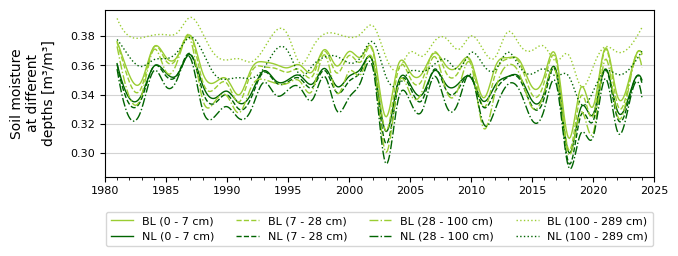

In [47]:
# plot evolution of yearly soil moisture across time
fig, ax = plt.subplots(figsize=(18*cm,5.5*cm))
ax.plot(x_spline, swvl1_BL_interpolated, color='yellowgreen', linewidth=1, linestyle='-', label="BL (0 - 7 cm)")
ax.plot(x_spline, swvl1_NL_interpolated, color='darkgreen', linewidth=1, linestyle='-', label="NL (0 - 7 cm)")
ax.plot(x_spline, swvl2_BL_interpolated, color='yellowgreen', linewidth=1, linestyle='--', label="BL (7 - 28 cm)")
ax.plot(x_spline, swvl2_NL_interpolated, color='darkgreen', linewidth=1, linestyle='--', label="NL (7 - 28 cm)")
ax.plot(x_spline, swvl3_BL_interpolated, color='yellowgreen', linewidth=1, linestyle='-.', label="BL (28 - 100 cm)")
ax.plot(x_spline, swvl3_NL_interpolated, color='darkgreen', linewidth=1, linestyle='-.', label="NL (28 - 100 cm)")
ax.plot(x_spline, swvl4_BL_interpolated, color='yellowgreen', linewidth=1, linestyle=':', label="BL (100 - 289 cm)")
ax.plot(x_spline, swvl4_NL_interpolated, color='darkgreen', linewidth=1, linestyle=':', label="NL (100 - 289 cm)")
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Soil moisture\nat different\ndepths [m³/m³]', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=8, fontsize=8,  bbox_to_anchor=(0.5, -0.45), ncols = 4)
plt.savefig("./Figures/Soil_Water_Yearly_GER.png", bbox_inches="tight", dpi = 300)

In [45]:
# calculate trend line for first soil layer
# get equation for trendline
fit_swvl1_BL = np.polyfit(swvl1_BL["year"], swvl1_BL["GER"], 1)
fit_swvl1_NL = np.polyfit(swvl1_NL["year"], swvl1_NL["GER"], 1)

fit_swvl1_BL_fun = np.poly1d(fit_swvl1_BL)
fit_swvl1_NL_fun = np.poly1d(fit_swvl1_NL)

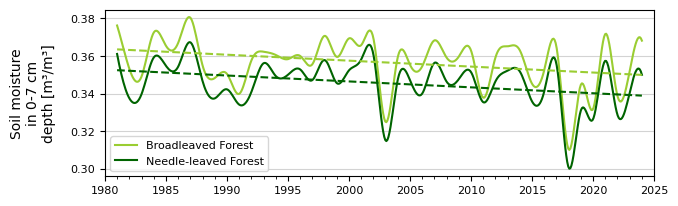

In [46]:
# plot evolution of yearly soil moisture for layer 1 across time
fig, ax = plt.subplots(figsize=(18*cm,5.5*cm))
ax.plot(x_spline, swvl1_BL_interpolated, color='yellowgreen', linewidth=1.5, linestyle='-', label="Broadleaved Forest")
ax.plot(x_spline, swvl1_NL_interpolated, color='darkgreen', linewidth=1.5, linestyle='-', label="Needle-leaved Forest")
ax.plot(swvl1_BL["year"], fit_swvl1_BL_fun(ndvi_BL['year']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(swvl1_NL["year"], fit_swvl1_NL_fun(ndvi_NL['year']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Soil moisture\nin 0-7 cm\ndepth [m³/m³]', fontsize=10, labelpad=10)
ax.set_xlim(1980, 2025)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=3, fontsize=8,  bbox_to_anchor=(0, 0))
plt.savefig("./Figures/Soil_Water_1_Yearly_GER.png", bbox_inches="tight", dpi = 300)

In [145]:
# get the columns for the federal states
state_columns = [col for col in swvl1_BL.columns if col not in ["time", "year", "GER"]]

# create denser range of x axis values
x_spline = np.linspace(swvl1_BL["year"].min(), swvl1_BL["year"].max(), 500)

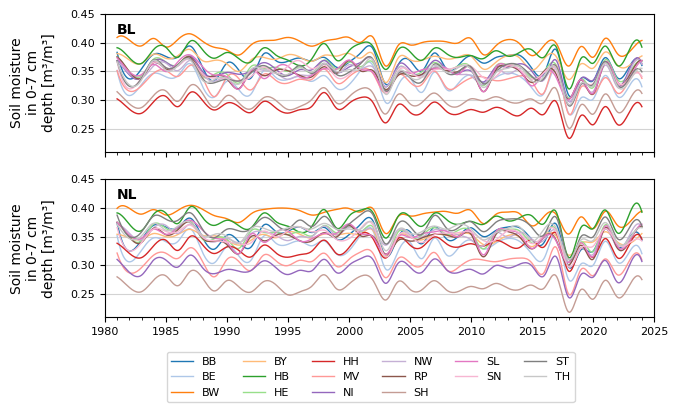

In [146]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True)
colors = plt.cm.tab20.colors

# loop through each state column for BL
for i, state in enumerate(state_columns):
    years = swvl1_BL["year"]
    values = swvl1_BL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax1.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax1.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax1.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax1.tick_params(axis='both', labelsize=8)
ax1.set_ylabel('Soil moisture\nin 0-7 cm\ndepth [m³/m³]', fontsize=10, labelpad=10)
ax1.set_xlim(1980, 2025)
ax1.set_ylim(0.21, 0.45)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(1981, 0.435, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

# loop through each state column for NL
for i, state in enumerate(state_columns):
    years = swvl1_NL["year"]
    values = swvl1_NL[state]
    spl = make_interp_spline(years, values)
    values_interpolated = spl(x_spline)
    ax2.plot(x_spline, values_interpolated, linewidth=1, color=colors[i % len(colors)], label=state)

ax2.xaxis.set_major_locator(mticker.MultipleLocator(5))
ax2.xaxis.set_minor_locator(mticker.MultipleLocator(1))
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('Soil moisture\nin 0-7 cm\ndepth [m³/m³]', fontsize=10, labelpad=10)
ax2.set_xlim(1980, 2025)
ax2.set_ylim(0.21, 0.45)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(1981, 0.435, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc='lower center', fontsize=8, bbox_to_anchor=(0.5, -0.12), ncols=6)

plt.savefig("./Figures/Soil_Water_1_Yearly_States.png", bbox_inches="tight", dpi = 300)
plt.show()

### SPEI

In [49]:
# read monthly SPEI data
spei_calc = pd.read_csv("./Tables/Spatial_Means/SPEI_calc_3M_Spatial_Means_GER.csv")
spei_db = pd.read_csv("./Tables/Spatial_Means/SPEI_database_3M_Spatial_Means_GER.csv")

In [50]:
# the first two dates (January and February 1981) contain only NAs because the SPEI is calculated with a 3-month window and there is no data available before 1981
spei_calc.dropna(inplace=True)

In [51]:
# convert dates to numeric to use in polyfit to calculate trend lines
# first convert the original time values to pandas datetime
spei_calc["time"] = pd.to_datetime(spei_calc["time"])
spei_db["time"] = pd.to_datetime(spei_db["time"])

# then create a new column with integer values that represent the dates
spei_calc["time_num"] = spei_calc["time"].map(pd.Timestamp.toordinal)
spei_db["time_num"] = spei_db["time"].map(pd.Timestamp.toordinal)

In [52]:
# calculate trend lines
# get equation for trendline
fit_spei_calc = np.polyfit(spei_calc["time_num"], spei_calc["GER"], 1)
fit_spei_db = np.polyfit(spei_db["time_num"], spei_db["GER"], 1)

fit_spei_calc_fun = np.poly1d(fit_spei_calc)
fit_spei_db_fun = np.poly1d(fit_spei_db)

In [53]:
spei_db

,time,GER,BB,BE,BW,BY,HB,HE,HH,MV,NI,NW,RP,SH,SL,SN,ST,TH,time_num
0,1981-01-16,0.607773,0.565035,NaN,0.106986,0.409815,NaN,0.324426,NaN,0.702715,0.969783,1.041045,0.602449,1.028769,0.318042,0.220727,0.878921,0.603984,723196
1,1981-02-15,0.428334,0.409415,NaN,0.394279,0.372011,NaN,0.083464,NaN,0.596588,0.580492,0.711728,0.544609,0.618191,0.463044,-0.058358,0.434976,0.162313,723226
2,1981-03-16,1.462595,1.923707,NaN,0.828452,0.687931,NaN,1.440621,NaN,2.037362,2.092128,1.843710,1.134964,2.073601,0.981582,1.123724,1.864254,1.509660,723255
3,1981-04-16,0.414364,0.659946,NaN,-0.524944,-0.665220,NaN,0.759310,NaN,0.779168,1.231069,0.907411,0.382356,1.303435,0.194570,0.356025,0.793413,0.775035,723286
4,1981-05-16,0.989989,0.753511,NaN,0.363841,-0.002812,NaN,1.584745,NaN,0.980581,1.839702,1.647625,1.065686,1.656462,0.737659,0.693799,1.291243,1.586844,723316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2023-08-16,-0.460030,-0.537199,NaN,-1.039619,-0.782729,NaN,-0.191217,NaN,-0.481509,-0.145232,-0.094738,-0.468440,-0.149590,-0.566938,-0.378525,-0.501915,-0.092353,738748
512,2023-09-16,-0.471239,-0.905429,NaN,-0.645602,-0.592919,NaN,-0.186239,NaN,-0.721173,-0.453638,0.151269,0.128012,-0.143911,-0.025872,-0.862886,-0.792627,-0.485541,738779
513,2023-10-16,-0.012287,-0.123462,NaN,-0.618178,-0.500541,NaN,0.232834,NaN,-0.022274,0.283141,0.508528,0.241747,0.767914,0.097657,-0.088114,-0.060078,0.179207,738809
514,2023-11-16,0.478862,0.199532,NaN,0.411966,0.103318,NaN,0.583835,NaN,0.540354,0.766807,0.955216,0.758425,1.359429,0.696160,-0.179522,0.432082,0.129020,738840


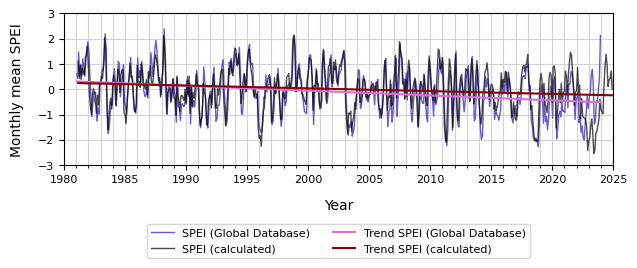

In [54]:
# plot evolution of SPEI across time, comparison between calculated and downloaded values
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot('time', 'GER', data=spei_db, color='slateblue', linewidth=1, linestyle='-', label="SPEI (Global Database)")
ax.plot('time', 'GER', data=spei_calc, color='black', linewidth=1, linestyle='-', alpha = 0.7, label="SPEI (calculated)")
ax.plot(spei_db["time"], fit_spei_db_fun(spei_db['time_num']), color='orchid', linewidth=1.5, linestyle='-', label = "Trend SPEI (Global Database)")
ax.plot(spei_calc["time"], fit_spei_calc_fun(spei_calc['time_num']), color='darkred', linewidth=1.5, linestyle='-', label = "Trend SPEI (calculated)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Monthly mean SPEI', fontsize=10, labelpad=10)
ax.set_xlabel('Year', fontsize=10, labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.set_ylim(-3, 3)
ax.grid(True, which='both', color='lightgrey')
ax.legend(loc=8, fontsize=8,  bbox_to_anchor=(0.5, -0.65), ncol = 2)
plt.savefig("./Figures/SPEI_comparison_calc_database_GER.png", bbox_inches="tight", dpi = 300)

In [55]:
# calculate the RMSE between calculated and downloaded SPEI
combined_spei = pd.DataFrame({
    'SPEI_db': spei_db['GER'],
    'SPEI_calc': spei_calc['GER']
})

combined_spei_clean = combined_spei.dropna()

spei_db_clean = combined_spei_clean['SPEI_db']
spei_calc_clean = combined_spei_clean['SPEI_calc']

rmse = root_mean_squared_error(spei_db_clean, spei_calc_clean)
rmse

0.4571619931500711

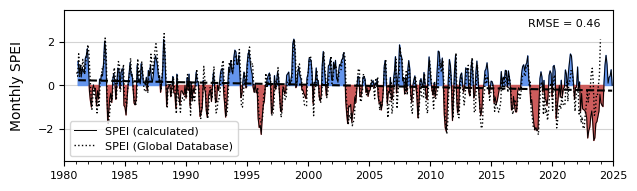

In [56]:
# plot evolution of calculated SPEI only, highlighting times of drought and non-drought
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
x = spei_calc['time']
y = spei_calc['GER']
ax.plot(x, y, color='black', linewidth=0.7, linestyle='-', label = "SPEI (calculated)")
ax.plot(spei_calc["time"], fit_spei_calc_fun(spei_calc['time_num']), color='black', linewidth=1.5, linestyle='--')
ax.fill_between(x, y, where=y>=0, interpolate=True, color='cornflowerblue')
ax.fill_between(x, y, where=y<=0, interpolate=True, color='indianred')
ax.plot('time', 'GER', data=spei_db, color='black', linewidth=1, linestyle=':', label="SPEI (Global Database)")
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('Monthly SPEI', fontsize=10, labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.set_ylim(-3.5, 3.5)
ax.set_axisbelow(True)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=3, fontsize=8,  bbox_to_anchor=(0, 0), ncol = 1)
ax.text(datetime(2018,1,1), 3.1, 'RMSE = 0.46', fontsize=8, va='top', ha='left')
plt.savefig("./Figures/SPEI_calc_GER.png", bbox_inches="tight", dpi = 300)

In [ ]:
# get the columns for the federal states
state_columns = [col for col in ndvi_BL.columns if col not in ["time", "time_num", "GER"]]

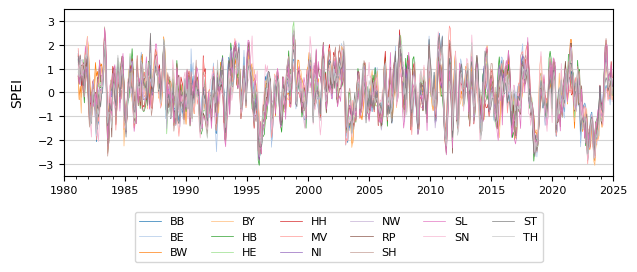

In [148]:
# plot evolution of spei in federal states over time
fig, ax = plt.subplots(figsize=(18*cm,5.5*cm))
colors = plt.cm.tab20.colors

start_year = 1980
end_year = 2025
major_tick_years = range(start_year, end_year + 1, 5)
major_tick_dates = [datetime(year, 1, 1) for year in major_tick_years]
ax.set_xticks(major_tick_dates)
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax.yaxis.set_major_locator(MultipleLocator(1))

for i, state in enumerate(state_columns):
    ax.plot(spei_calc['time'], spei_calc[state], linewidth=0.5, color=colors[i], label=state)

ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('SPEI', fontsize=10, labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.set_ylim(-3.5, 3.5)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=8, fontsize=8,  bbox_to_anchor=(0.5, -0.55), ncols = 6)
plt.savefig("./Figures/SPEI_calc_3M_States.png", bbox_inches="tight", dpi = 300)
plt.show()

### GPP

In [57]:
# load spatial means of NIRv time series
nirv_BL = pd.read_csv("./Tables/Spatial_Means/NIRv_Monthly_Spatial_Means_BL.csv", index_col = 0)
nirv_NL = pd.read_csv("./Tables/Spatial_Means/NIRv_Monthly_Spatial_Means_NL.csv", index_col = 0)

# convert the time values to pandas datetime
nirv_BL["time"] = pd.to_datetime(nirv_BL["time"])
nirv_NL["time"] = pd.to_datetime(nirv_NL["time"])

In [58]:
# load spatial means of MODIS and VOCDCA2 GPP time series
gpp_modis_BL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_BL.csv")
gpp_modis_NL = pd.read_csv("./Tables/Spatial_Means/GPP_MODIS_Monthly_Spatial_Means_NL.csv")
gpp_vodca_BL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_BL.csv")
gpp_vodca_NL = pd.read_csv("./Tables/Spatial_Means/GPP_VODCA2_Monthly_Spatial_Means_NL.csv")

# convert the time values to pandas datetime
gpp_modis_BL["time"] = pd.to_datetime(gpp_modis_BL["time"])
gpp_modis_NL["time"] = pd.to_datetime(gpp_modis_NL["time"])
gpp_vodca_BL["time"] = pd.to_datetime(gpp_vodca_BL["time"])
gpp_vodca_NL["time"] = pd.to_datetime(gpp_vodca_NL["time"])

In [6]:
# merge NIRv and downloaded GPP datasets into dataframes with common time values to create scatterplots to compare the datasets
df_nirv_modis_BL = pd.merge(
    nirv_BL[['time', 'GER']],
    gpp_modis_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)

df_nirv_modis_NL = pd.merge(
    nirv_NL[['time', 'GER']],
    gpp_modis_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_MODIS'))
df_nirv_modis_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_MODIS" : "MODIS GPP"}, inplace = True)

df_nirv_vodca_BL = pd.merge(
    nirv_BL[['time', 'GER']],
    gpp_vodca_BL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_BL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

df_nirv_vodca_NL = pd.merge(
    nirv_NL[['time', 'GER']],
    gpp_vodca_NL[['time', 'GER']],
    on='time',
    suffixes=('_NIRv', '_VODCA2'))
df_nirv_vodca_NL.rename(columns = {"GER_NIRv" : "NIRv", "GER_VODCA2" : "VODCA2 GPP"}, inplace = True)

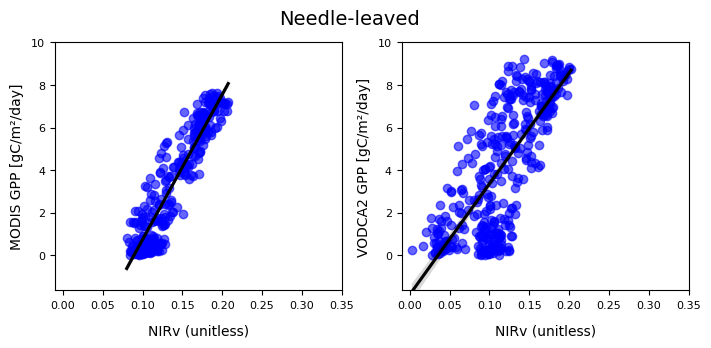

In [7]:
# scatterplots of GPP MODIS, NIRv and GPP VODCA2, NIRv 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18*cm, 9*cm))

# NIRv vs MODIS NL
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_NL, ax = ax1, scatter_kws={"alpha":0.6, "color":"blue"}, line_kws={"color":"black"})
ax1.set_xlabel('NIRv (unitless)', fontsize=10, labelpad=10)
ax1.set_ylabel('MODIS GPP [gC/m²/day]', fontsize=10, labelpad=5)
ax1.set_xlim(-0.01, 0.35)
ax1.set_ylim(-1.65, 10)
ax1.tick_params(axis='both', labelsize=8)

# NIRv vs VODCA NL
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_NL, ax = ax2, scatter_kws={"alpha":0.6, "color":"blue"}, line_kws={"color":"black"})
ax2.set_xlabel('NIRv (unitless)', fontsize=10, labelpad=10)
ax2.set_ylabel('VODCA2 GPP [gC/m²/day]', fontsize=10, labelpad=5)
ax2.set_xlim(-0.01, 0.35)
ax2.set_ylim(-1.65, 10)
ax2.tick_params(axis='both', labelsize=8)
fig.text(0.5, 0.97, 'Needle-leaved', ha='center', va='top', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.93])

# get parameters of plot to ensure BL plot has the same size
sub_params = fig.subplotpars
left = sub_params.left
right = sub_params.right
bottom = sub_params.bottom
top = sub_params.top
wspace = sub_params.wspace
hspace = sub_params.hspace

plt.savefig("./Figures/NIRv_GPP_Scatterplot_NL.png", bbox_inches="tight", dpi = 300)
plt.show()

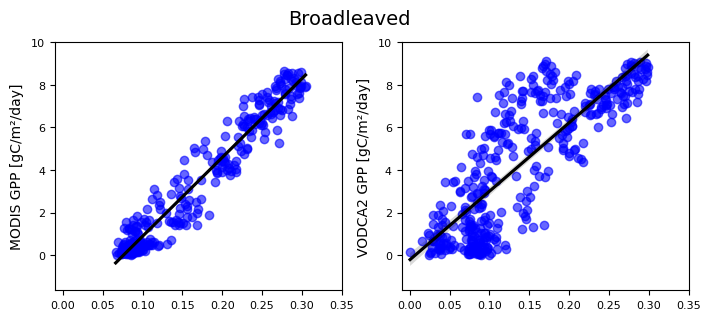

In [8]:
# scatterplots of GPP MODIS, NIRv and GPP VODCA2, NIRv 
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18*cm, 9*cm))

# NIRv vs MODIS BL
sns.regplot(x = "NIRv", y = "MODIS GPP", data = df_nirv_modis_BL, ax = ax1, scatter_kws={"alpha":0.6, "color":"blue"}, line_kws={"color":"black"})
ax1.set_ylabel('MODIS GPP [gC/m²/day]', fontsize=10, labelpad=5)
ax1.set_xlabel('') # remove x-label for the top plot to prevent redundancy
ax1.set_xlim(-0.01, 0.35)
ax1.set_ylim(-1.65, 10)
ax1.tick_params(axis='both', labelsize=8)

# NIRv vs VODCA BL
sns.regplot(x = "NIRv", y = "VODCA2 GPP", data = df_nirv_vodca_BL, ax = ax2, scatter_kws={"alpha":0.6, "color":"blue"}, line_kws={"color":"black"})
ax2.set_ylabel('VODCA2 GPP [gC/m²/day]', fontsize=10, labelpad=5)
ax2.set_xlabel('') # remove x-label for the top plot to prevent redundancy
ax2.set_xlim(-0.01, 0.35)
ax2.set_ylim(-1.65, 10)
ax2.tick_params(axis='both', labelsize=8)
fig.text(0.5, 0.97, 'Broadleaved', ha='center', va='top', fontsize=14)

fig.subplots_adjust(left=left, right=right, bottom=bottom, top=top, wspace=wspace, hspace=hspace)
plt.savefig("./Figures/NIRv_GPP_Scatterplot_BL.png", bbox_inches="tight", dpi = 300)
plt.show()

In [59]:
# load HARMONIZED spatial means of GPP time series calculated from NIRv
gpp_nirv_BL = pd.read_csv("./Tables/Spatial_Means/GPP_NIRv_Monthly_Spatial_Means_BL_harmonized.csv")
gpp_nirv_NL = pd.read_csv("./Tables/Spatial_Means/GPP_NIRv_Monthly_Spatial_Means_NL_harmonized.csv")

# convert the time values to pandas datetime
gpp_nirv_BL["time"] = pd.to_datetime(gpp_nirv_BL["time"])
gpp_nirv_NL["time"] = pd.to_datetime(gpp_nirv_NL["time"])

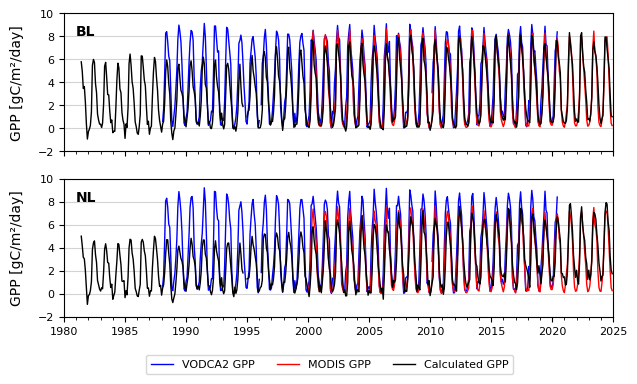

In [65]:
# combine plots of BL and NL evolution into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True)

ax1.plot('time', 'GER', data=gpp_vodca_BL, color='blue', linewidth=1, linestyle='-', label="VODCA2 GPP")
ax1.plot('time', 'GER', data=gpp_modis_BL, color='red', linewidth=1, linestyle='-', label="MODIS GPP")
ax1.plot('time', 'GER', data=gpp_nirv_BL, color='black', linewidth=1, linestyle='-', label="Calculated GPP")
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_minor_locator(mdates.YearLocator(1))
ax1.tick_params(axis='both', labelsize=8)
ax1.set_ylabel('GPP [gC/m²/day]', fontsize=10, labelpad=10)
ax1.set_xlabel('')
ax1.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax1.set_ylim(-2, 10)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(datetime(1981, 1, 1), 9, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

ax2.plot('time', 'GER', data=gpp_vodca_NL, color='blue', linewidth=1, linestyle='-', label="VODCA2 GPP")
ax2.plot('time', 'GER', data=gpp_modis_NL, color='red', linewidth=1, linestyle='-', label="MODIS GPP")
ax2.plot('time', 'GER', data=gpp_nirv_NL, color='black', linewidth=1, linestyle='-', label="Calculated GPP")
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_minor_locator(mdates.YearLocator(1))
ax2.tick_params(axis='both', labelsize=8)
ax2.set_ylabel('GPP [gC/m²/day]', fontsize=10, labelpad=10)
ax1.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax2.set_ylim(-2, 10)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(datetime(1981, 1, 1), 9, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc=8, fontsize=8, bbox_to_anchor=(0.5, -0.05), ncols=3)

plt.savefig("./Figures/GPP_comparison_harmonized.png", bbox_inches="tight", dpi = 300)
plt.show()

In [66]:
# convert dates to numeric to use in polyfit to calculate trend lines
# create a new column with integer values that represent the dates
gpp_nirv_BL["time_num"] = gpp_nirv_BL["time"].map(pd.Timestamp.toordinal)
gpp_nirv_NL["time_num"] = gpp_nirv_NL["time"].map(pd.Timestamp.toordinal)

In [67]:
# check for NAs before calculating trend lines
print(gpp_nirv_BL.isna().sum())

time         0
GER          3
BB           8
BE          30
BW           3
BY           4
HB          50
HE           6
HH          51
MV          30
NI           9
NW           4
RP           5
SH          33
SL          11
SN           5
ST           7
TH           6
time_num     0
dtype: int64


In [68]:
# drop NAs before calculating trend lines
gpp_nirv_BL_clean = gpp_nirv_BL.dropna(subset=["time", "GER"])
gpp_nirv_NL_clean = gpp_nirv_NL.dropna(subset=["time", "GER"])

In [69]:
# calculate trend lines
# get equation for trendline
fit_gpp_nirv_BL = np.polyfit(gpp_nirv_BL_clean["time_num"], gpp_nirv_BL_clean["GER"], 1)
fit_gpp_nirv_NL = np.polyfit(gpp_nirv_NL_clean["time_num"], gpp_nirv_NL_clean["GER"], 1)

fit_gpp_nirv_BL_fun = np.poly1d(fit_gpp_nirv_BL)
fit_gpp_nirv_NL_fun = np.poly1d(fit_gpp_nirv_NL)

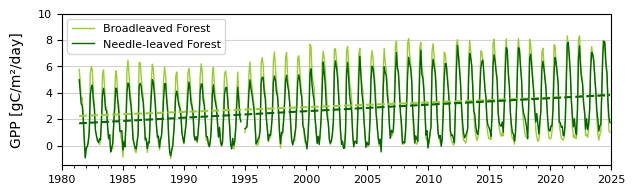

In [71]:
# time series for NIRv GPP with trend lines for BL and NL
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot('time', 'GER', data=gpp_nirv_BL, color='yellowgreen', linewidth=1, linestyle='-', label="Broadleaved Forest")
ax.plot('time', 'GER', data=gpp_nirv_NL, color='darkgreen', linewidth=1, linestyle='-', label="Needle-leaved Forest")
ax.plot(gpp_nirv_BL["time"], fit_gpp_nirv_BL_fun(gpp_nirv_BL['time_num']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(gpp_nirv_NL["time"], fit_gpp_nirv_NL_fun(gpp_nirv_NL['time_num']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('GPP [gC/m²/day]', fontsize=10, labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.set_ylim(-1.5, 10)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=2, fontsize=8,  bbox_to_anchor=(0,1), ncol = 1)
plt.savefig("./Figures/GPP_NIRv_Monthly_GER.png", bbox_inches="tight", dpi = 300)

In [6]:
# drop time_num column again
gpp_nirv_BL = gpp_nirv_BL.drop(columns = "time_num")
gpp_nirv_NL = gpp_nirv_NL.drop(columns = "time_num")

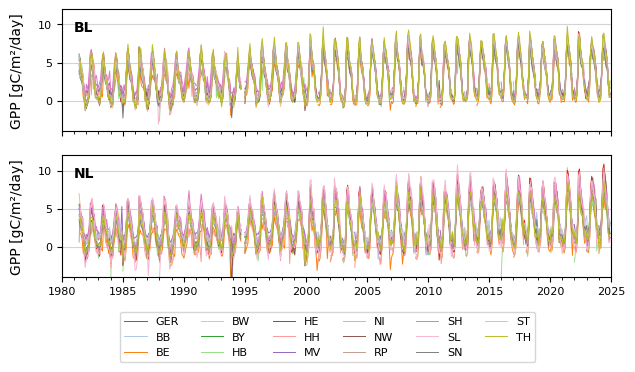

In [ ]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True) 
colors = plt.cm.tab20.colors

gpp_nirv_BL.plot(x="time", ax=ax1, linewidth=0.7, color=colors)
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_minor_locator(mdates.YearLocator(1))
ax1.tick_params(axis='x', labelsize=8, rotation=0)
ax1.tick_params(axis='y', labelsize=8)
for label in ax1.get_xticklabels():
    label.set_horizontalalignment('center')
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylabel('GPP [gC/m²/day]', fontsize=10, labelpad=10)
ax1.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax1.set_ylim(-4, 12)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(datetime(1981, 1, 1), 10.5, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

gpp_nirv_NL.plot(x="time", ax=ax2, linewidth=0.7, color=colors)
ax2.xaxis.set_major_locator(mdates.YearLocator(5))
ax2.xaxis.set_minor_locator(mdates.YearLocator(1))
ax2.tick_params(axis='x', labelsize=8, rotation=0)
ax2.tick_params(axis='y', labelsize=8)
for label in ax2.get_xticklabels():
    label.set_horizontalalignment('center')
ax2.set_ylabel('GPP [gC/m²/day]', fontsize=10, labelpad=10)
ax2.set_xlabel("")
ax2.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax2.set_ylim(-4, 12)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(datetime(1981, 1, 1), 10.5, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc=8, fontsize=8, bbox_to_anchor=(0.5, -0.03), ncols=6)

plt.savefig("./Figures/GPP_NIRv_Monthly_States_harmonized.png", bbox_inches="tight", dpi = 300)
plt.show()

### NPP

In [72]:
# read calculated monthly mean npp data
npp_BL = pd.read_csv("./Tables/Spatial_Means/NPP_calc_Monthly_Spatial_Means_BL.csv")
npp_NL = pd.read_csv("./Tables/Spatial_Means/NPP_calc_Monthly_Spatial_Means_NL.csv")

# convert the time values to pandas datetime
npp_BL["time"] = pd.to_datetime(npp_BL["time"])
npp_NL["time"] = pd.to_datetime(npp_NL["time"])

In [73]:
# convert dates to numeric to use in polyfit to calculate trend lines
# create a new column with integer values that represent the dates
npp_BL["time_num"] = npp_BL["time"].map(pd.Timestamp.toordinal)
npp_NL["time_num"] = npp_NL["time"].map(pd.Timestamp.toordinal)

In [74]:
# check for NAs before calculating trend lines
print(npp_BL.isna().sum())

time         0
GER          3
BB           8
BE          30
BW           3
BY           4
HB          50
HE           6
HH          51
MV          30
NI           9
NW           4
RP           5
SH          33
SL          11
SN           5
ST           7
TH           6
time_num     0
dtype: int64


In [75]:
# drop NAs before calculating trend lines
npp_BL_clean = npp_BL.dropna(subset=["time", "GER"])
npp_NL_clean = npp_NL.dropna(subset=["time", "GER"])

In [76]:
# calculate trend lines
# get equation for trendline
fit_npp_BL = np.polyfit(npp_BL_clean["time_num"], npp_BL_clean["GER"], 1)
fit_npp_NL = np.polyfit(npp_NL_clean["time_num"], npp_NL_clean["GER"], 1)

fit_npp_BL_fun = np.poly1d(fit_npp_BL)
fit_npp_NL_fun = np.poly1d(fit_npp_NL)

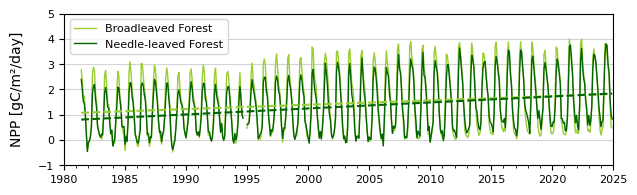

In [77]:
# time series for NPP with trend lines for BL and NL
fig, ax = plt.subplots(figsize=(18*cm,5*cm))
ax.plot('time', 'GER', data=npp_BL, color='yellowgreen', linewidth=1, linestyle='-', label="Broadleaved Forest")
ax.plot('time', 'GER', data=npp_NL, color='darkgreen', linewidth=1, linestyle='-', label="Needle-leaved Forest")
ax.plot(npp_BL["time"], fit_npp_BL_fun(npp_BL['time_num']), color='yellowgreen', linewidth=1.5, linestyle='--')
ax.plot(npp_NL["time"], fit_npp_NL_fun(npp_NL['time_num']), color='darkgreen', linewidth=1.5, linestyle='--')
ax.xaxis.set_major_locator(mdates.YearLocator(5))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))
ax.tick_params(axis='both', labelsize=8)
ax.set_ylabel('NPP [gC/m²/day]', fontsize=10, labelpad=10)
ax.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax.set_ylim(-1, 5)
ax.grid(True, axis = "y", color='lightgrey')
ax.legend(loc=2, fontsize=8,  bbox_to_anchor=(0, 1))
plt.savefig("./Figures/NPP_Monthly_GER.png", bbox_inches="tight", dpi = 300)

In [189]:
# drop time_num column again
npp_BL = npp_BL.drop(columns = "time_num")
npp_NL = npp_NL.drop(columns = "time_num")

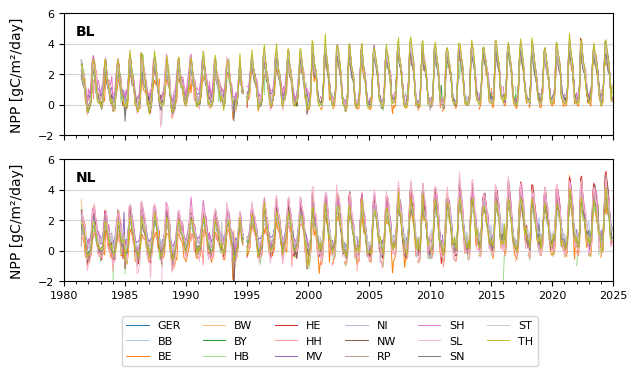

In [42]:
# combine plots of BL and NL evolution in states into one figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18*cm, 10*cm), sharex=True) 
colors = plt.cm.tab20.colors

npp_BL.plot(x="time", ax=ax1, linewidth=0.7, color=colors)
ax1.xaxis.set_major_locator(mdates.YearLocator(5))
ax1.xaxis.set_minor_locator(mdates.YearLocator(1))
ax1.tick_params(axis='x', labelsize=8, rotation=0)
ax1.tick_params(axis='y', labelsize=8)
for label in ax1.get_xticklabels():
    label.set_horizontalalignment('center')
ax1.tick_params(axis='y', labelsize=8)
ax1.set_ylabel('NPP [gC/m²/day]', fontsize=10, labelpad=10)
ax1.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax1.set_ylim(-2, 6)
ax1.grid(True, axis = "y", color='lightgrey')
ax1.text(datetime(1981, 1, 1), 5.25, 'BL', fontsize=10, fontweight='bold', va='top', ha='left')

npp_NL.plot(x="time", ax=ax2, linewidth=0.7, color=colors)
ax2.xaxis.set_major_locator(mdates.YearLocator(5))
ax2.xaxis.set_minor_locator(mdates.YearLocator(1))
ax2.tick_params(axis='x', labelsize=8, rotation=0)
ax2.tick_params(axis='y', labelsize=8)
for label in ax2.get_xticklabels():
    label.set_horizontalalignment('center')
ax2.set_ylabel('NPP [gC/m²/day]', fontsize=10, labelpad=10)
ax2.set_xlabel("")
ax2.set_xlim(datetime(1980, 1, 1), datetime(2025, 1, 1))
ax2.set_ylim(-2, 6)
ax2.grid(True, axis = "y", color='lightgrey')
ax2.text(datetime(1981, 1, 1), 5.25, 'NL', fontsize=10, fontweight='bold', va='top', ha='left')

handles, labels = ax1.get_legend_handles_labels()

# remove individual legends from subplots
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

# create a single legend for the entire figure
fig.legend(handles, labels, loc=8, fontsize=8, bbox_to_anchor=(0.5, -0.03), ncols=6)

plt.savefig("./Figures/NPP_Monthly_States.png", bbox_inches="tight", dpi = 300)
plt.show()